------------------------------------------------------------------------------------------------------
# Finding the Best Chocolate Bars
------------------------------------------------------------------------------------------------------


## 1. What is the average rating by country of origin?

### we will firstly take a look at the available data:

In [1]:
import pandas as pd

chocolate_df = pd.read_csv('data/chocolate_bars.csv')
chocolate_df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


### To discover the average rating by country we can group the data by origin and take its average rating: 

In [2]:
chocolate_origin_sr = chocolate_df.groupby("bean_origin")["rating"].mean()
chocolate_origin_sr

bean_origin
Australia    3.250000
Belize       3.233553
Blend        3.038462
Bolivia      3.181250
Brazil       3.262821
               ...   
U.S.A.       3.242424
Uganda       3.065789
Vanuatu      3.115385
Venezuela    3.231225
Vietnam      3.287671
Name: rating, Length: 62, dtype: float64

### We ended up with a panda series containning the average rating for each country in the chocolate_df dataframe.

## 2. How many bars were reviewed for each of those countries?

### We can answer this question by counting the number of times a country appears in the chocolate_df dataframe:

In [3]:
bars_per_country_sr = chocolate_df["bean_origin"].value_counts()
bars_per_country_sr

Venezuela                253
Peru                     244
Dominican Republic       226
Ecuador                  219
Madagascar               177
                        ... 
Sumatra                    1
St.Vincent-Grenadines      1
Martinique                 1
Burma                      1
DR Congo                   1
Name: bean_origin, Length: 62, dtype: int64

### We ended up with a panda series containning the number of bars for each country in the chocolate_df dataframe.

## 3. Create plots to visualize findings for questions 1 and 2.

### To visualize the average rating for each country, we will use a bar plot and sort the values in an ascending form:

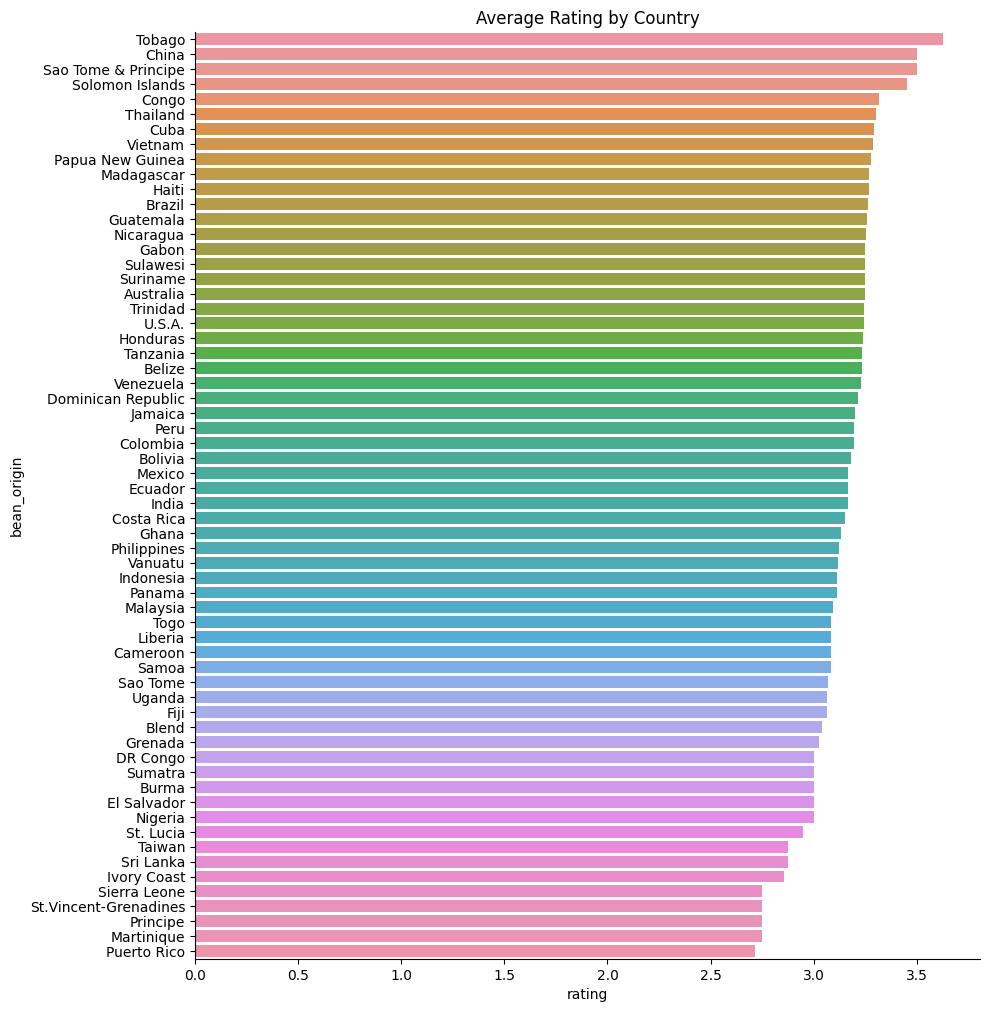

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

chocolate_origin_df = chocolate_origin_sr.to_frame().reset_index().sort_values("rating", ascending=False)

average_rating_plt = sns.catplot(x="rating", y="bean_origin", data=chocolate_origin_df, kind="bar", ci=None, height=10)
plt.tick_params(axis='y', labelsize=10)
plt.title("Average Rating by Country")
plt.show()

### To visualize the number of bars per country, we will also show a bar plot:

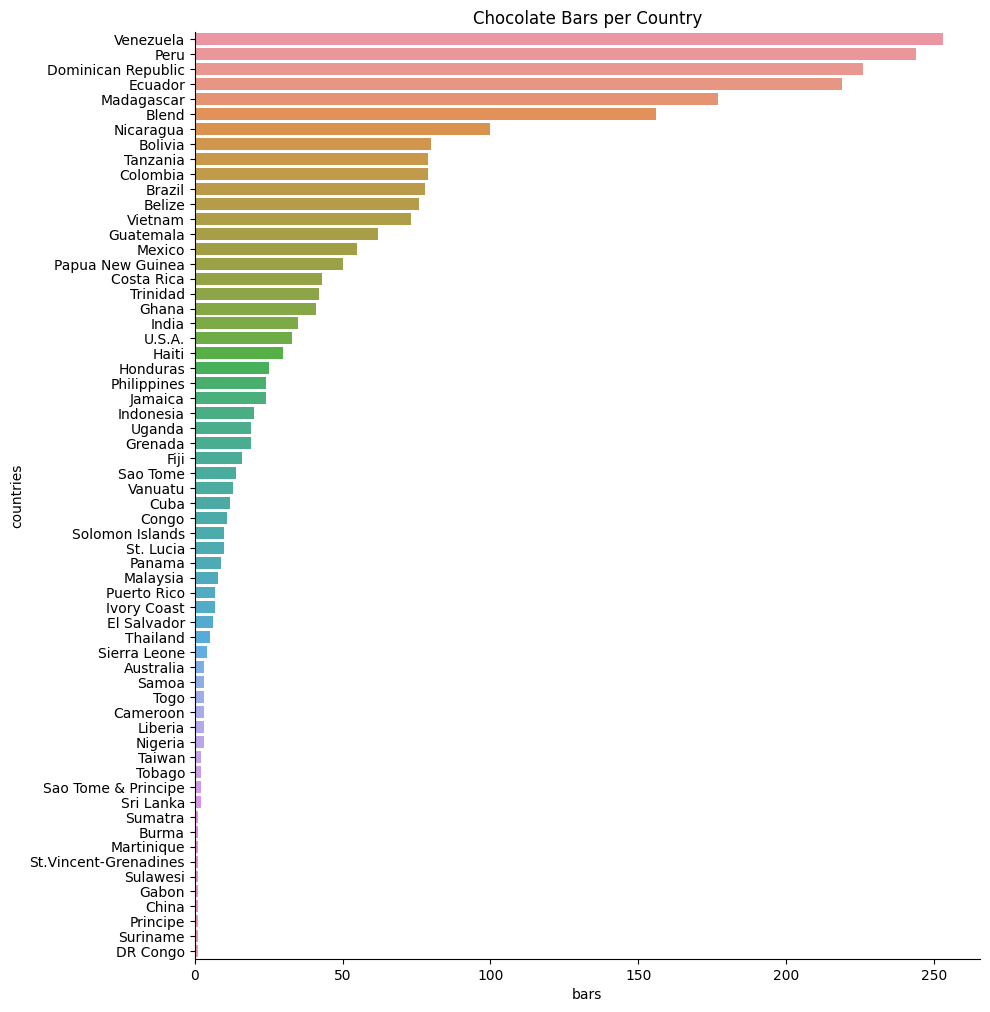

In [5]:
bars_per_country_df = bars_per_country_sr.rename_axis('countries').reset_index(name='bars').sort_values('bars', ascending=False)

bars_per_country_plt = sns.catplot(x='bars', y='countries', data=bars_per_country_df, kind='bar', height=10)
plt.title("Chocolate Bars per Country")
plt.show()

## 4. Is the cacao bean's origin an indicator of quality?

### We can do a statistic summary of the rating column in the chocolate_origin_df dataframe to try to answer this question:

In [6]:
print(chocolate_origin_df['rating'].describe())

print((chocolate_origin_df['rating'].max() - chocolate_origin_df['rating'].min())/5)

count    62.000000
mean      3.136862
std       0.186082
min       2.714286
25%       3.044471
50%       3.164335
75%       3.250000
max       3.625000
Name: rating, dtype: float64
0.1821428571428571


### Considering that the difference between min and max values is 18%, we can say that there is a small chance the bean's origin indicates a difference in quality. But that doesn't mean it does indicate, since we didn't consider other variabes in the analisys!

## 5. How does the combination of ingredients relates to rating? What about cocoa content? What is the average cocoa content for bars with higher ratings (above 3.5)?

### We can make a plot using the ingredients and rating columns in the chocolate_df dataframe to take a look:

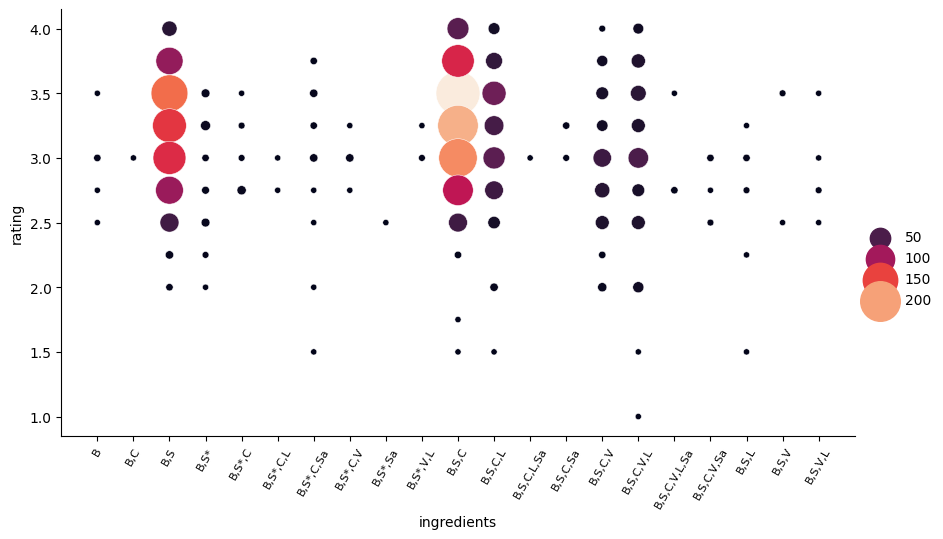

In [16]:
ingredients_rating_sr = chocolate_df.groupby("ingredients")["rating"].value_counts().rename("quantity")
ingredients_rating_df = pd.DataFrame(ingredients_rating_sr)

sizes = ingredients_rating_df["quantity"].to_list()

ingredients_rating_plt = sns.relplot(x='ingredients', y='rating', data=ingredients_rating_df, kind='scatter', palette="rocket", hue=sizes, size=sizes, sizes=(20,1000), aspect=1.75)
plt.xticks(rotation=60, fontsize=8)
plt.show()


### We see that the rating values are distributed mostly between 2.0 and 3.5 for most combinations of ingredients. But to be more precise, we will calculate the mean of the ingredients' ratings:

In [8]:
ingredients_mean_df = chocolate_df.groupby("ingredients")["rating"].mean().to_frame().reset_index().sort_values("rating", ascending=False)
print(ingredients_mean_df)

print(ingredients_mean_df.iloc[0,1] - ingredients_mean_df.iloc[-1,1])

     ingredients    rating
10         B,S,C  3.278529
2            B,S  3.229457
11       B,S,C,L  3.213287
19         B,S,V  3.166667
13      B,S,C,Sa  3.150000
6      B,S*,C,Sa  3.112500
15     B,S,C,V,L  3.089674
9       B,S*,V,L  3.083333
7       B,S*,C,V  3.000000
1            B,C  3.000000
12    B,S,C,L,Sa  3.000000
14       B,S,C,V  2.975177
3           B,S*  2.959677
0              B  2.958333
16  B,S,C,V,L,Sa  2.937500
4         B,S*,C  2.937500
20       B,S,V,L  2.900000
5       B,S*,C,L  2.875000
17    B,S,C,V,Sa  2.791667
18         B,S,L  2.687500
8        B,S*,Sa  2.500000
0.7785285285285286


### Now we can see that the difference between the combination of ingredients at the top and the bottom is 0.78, which represents 15,6% of difference. We could say that the ingredients have a correlation with the rating, but not exactly a causation.

### For the cocoa content we create a plot using the columns cocoa_percent and rating:

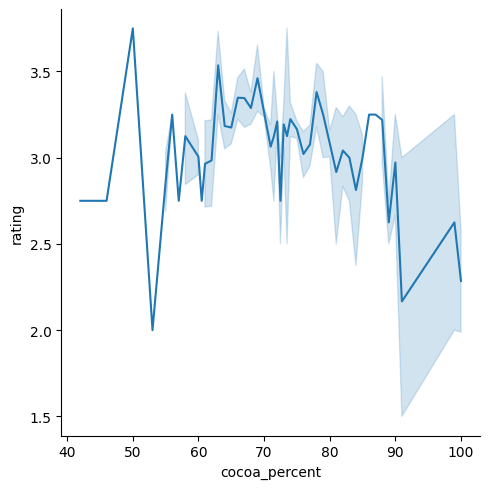

In [9]:
cocoa_rating_plt = sns.relplot(x="cocoa_percent", y="rating", data=chocolate_df, kind="line")
plt.show()

### We can notice that since the line varies without a pattern, it is safe to say that there isn't a good correlation between the percentage of cocoa and rating. For a precise value of correlation, we can calculate:

In [13]:
cocoa_rating_corr = chocolate_df["cocoa_percent"].corr(chocolate_df["rating"])
print(cocoa_rating_corr)

-0.14668959508034707


### Just as we thougth! The correlation is very low, so we can say that it isn't meaningful for these variables.

### To discover the average cocoa content for bars with ratings higher than 3.5 we can select only the rows in the chocolate_df dataframe that have a rating above 3.5 and analyze their content:

In [10]:
chocolate_high_rating_df = chocolate_df[chocolate_df["rating"] > 3.5]
chocolate_high_rating_df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
17,1011,A. Morin,France,2013,Ecuador,Equateur,70.0,4.0,"B,S,C,L","sandy, nutty, cocoa, fig",3.75
18,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.0,"B,S,C,L","oily, nut, caramel, raspberry",4.00
19,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,3.0,"B,S,C","sweet, cocoa, tangerine",4.00
...,...,...,...,...,...,...,...,...,...,...,...
2508,2048,Zoto (Chocolatoa),Belgium,2018,Nicaragua,"El Castillero, batch ca1705, 3 turns",70.0,3.0,"B,S,C","large grits, sweet, dried fruit",3.75
2513,647,Zotter,Austria,2011,Peru,Peru,70.0,4.0,"B,S*,C,Sa","creamy, fatty, mild nutty",3.75
2523,875,Zotter,Austria,2012,Dominican Republic,"Loma Los Pinos, Yacao region, D.R.",62.0,4.0,"B,S*,C,Sa","spice, caramel, toffee, salty",3.75
2524,879,Zotter,Austria,2012,Dominican Republic,Santo Domingo,70.0,4.0,"B,S*,C,Sa","strawberry, Cadbury egg",3.75


### Now we can calculate the mean for the cocoa_percent column:

In [15]:
cocoa_high_rating_mean = chocolate_high_rating_df["cocoa_percent"].mean()
cocoa_high_rating_mean

70.94781553398059

### The mean of cocoa for the bars with more than 3.5 of rating is 71%!

## 6. Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

### For this task we will make a search through the ingredients column to find all rows that contain the letter "L" and split the dataframe in two:

In [34]:
chocolate_df = chocolate_df.dropna(how='any')
chocolate_lecithin_df = chocolate_df[chocolate_df["ingredients"].str.contains('L')]
chocolate_not_lecithin_df = chocolate_df[chocolate_df["ingredients"].str.contains('L') == False]

cocoa_lecithin_mean = chocolate_lecithin_df["rating"].mean()
cocoa_not_lecithin_mean = chocolate_not_lecithin_df["rating"].mean()

print("The mean rating for the bars with lecithin is: ", cocoa_lecithin_mean)
print("The mean rating for the bars without lecithin is: ", cocoa_not_lecithin_mean)

The mean rating for the bars with lecithin is:  3.150608519269777
The mean rating for the bars without lecithin is:  3.2251282051282053


### As we can see, the bars without lecithin have a small probability to have a higher rating than the bars with lecithin.

## In this project we discovered some information about how different variables relate to the rating of chocolate bars. For a deeper analisys you can compare which variables have a bigger influence in the quality of the chocolate bars. Feel free to use this project to find your own discoveries about the chocolate world!